In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df=pd.read_csv('Datasets/powerlifting_dataset.csv')

In [7]:
data.head()

,Lifter Name,Age,Weight Class,Lift Type,Amount Lifted (kg)
0,Jessica Wilson,46,59 kg,Bench Press,269
1,John Doe,60,83 kg,Bench Press,179
2,Emily Davis,41,105 kg,Bench Press,235
3,Emily Davis,33,66 kg,Squat,359
4,Laura Taylor,56,74 kg,Deadlift,221


In [9]:
data.columns

Index(['Lifter Name', 'Age', 'Weight Class', 'Lift Type',
       'Amount Lifted (kg)'],
      dtype='object')

## What is the total amount lifted by each lifter?

In [16]:
total_lift_per_lifter = df.groupby('Lifter Name')['Amount Lifted (kg)'].sum()
print("Total Amount Lifted by Each Lifter:")
total_lift_per_lifter

Total Amount Lifted by Each Lifter:


Lifter Name
Chris Brown         77165
Daniel Lee          74776
Emily Davis         84808
Jane Smith          75441
Jessica Wilson      72666
John Doe            73317
Laura Taylor        73925
Matthew Anderson    73541
Michael Johnson     71847
Sarah Thomas        73512
Name: Amount Lifted (kg), dtype: int64

## How many lifters are in each lift type?

In [19]:
lift_type_counts = df['Lift Type'].value_counts()
print("Number of Lifters by Lift Type:")
lift_type_counts

Number of Lifters by Lift Type:


Lift Type
Deadlift       1025
Bench Press    1011
Squat           964
Name: count, dtype: int64

## Find the lifters who lifted the highest and the lowest amounts

In [22]:
max_lift = df['Amount Lifted (kg)'].max()
min_lift = df['Amount Lifted (kg)'].min()

max_lifter = df[df['Amount Lifted (kg)'] == max_lift]
min_lifter = df[df['Amount Lifted (kg)'] == min_lift]

print(f"Lifter with Highest Lift: {max_lifter['Lifter Name'].values[0]} with {max_lift} kg")
print(f"Lifter with Lowest Lift: {min_lifter['Lifter Name'].values[0]} with {min_lift} kg")

Lifter with Highest Lift: Jane Smith with 399 kg
Lifter with Lowest Lift: Daniel Lee with 100 kg


## What is the median amount lifted by lifters in each weight class?

In [25]:
median_lift_by_class = df.groupby('Weight Class')['Amount Lifted (kg)'].median()
print("Median Amount Lifted by Weight Class:")
median_lift_by_class

Median Amount Lifted by Weight Class:


Weight Class
105 kg    266.0
120 kg    253.0
52 kg     250.5
59 kg     247.5
66 kg     249.5
74 kg     246.0
83 kg     258.0
93 kg     244.0
Open      244.5
Name: Amount Lifted (kg), dtype: float64

## What is the distribution of lifters across different weight classes?

In [28]:
weight_class_counts = df['Weight Class'].value_counts()
print("Distribution of Lifters by Weight Class:")
weight_class_counts

Distribution of Lifters by Weight Class:


Weight Class
93 kg     359
Open      356
59 kg     348
83 kg     327
66 kg     326
52 kg     326
74 kg     321
120 kg    319
105 kg    318
Name: count, dtype: int64

## What is the total amount lifted by all lifters combined?

In [31]:
total_amount_lifted = np.sum(df['Amount Lifted (kg)'])
print(f"Total Amount Lifted by All Lifters: {total_amount_lifted} kg")

Total Amount Lifted by All Lifters: 750998 kg


## Get the lifters who lifted more than the average amount.

In [155]:
average_lift = np.mean(df['Amount Lifted (kg)'])
high_lifters = df[df['Amount Lifted (kg)'] > average_lift]
print("Lifters who Lifted More Than the Average Amount:")
print(high_lifters[['Lifter Name', 'Amount Lifted (kg)']])

Lifters who Lifted More Than the Average Amount:
          Lifter Name  Amount Lifted (kg)
0      Jessica Wilson                 269
3         Emily Davis                 359
5        Sarah Thomas                 264
8     Michael Johnson                 265
10       Laura Taylor                 328
...               ...                 ...
2987         John Doe                 287
2990     Laura Taylor                 287
2991         John Doe                 263
2998      Chris Brown                 333
2999       Daniel Lee                 280

[1497 rows x 2 columns]


## What is the median amount lifted by lifters in each weight class?

In [159]:
median_lift_by_class = df.groupby('Weight Class')['Amount Lifted (kg)'].median()
print("Median Amount Lifted by Weight Class:")
print(median_lift_by_class)

Median Amount Lifted by Weight Class:
Weight Class
105 kg    266.0
120 kg    253.0
52 kg     250.5
59 kg     247.5
66 kg     249.5
74 kg     246.0
83 kg     258.0
93 kg     244.0
Open      244.5
Name: Amount Lifted (kg), dtype: float64


##  Calculate the standard deviation of the amount lifted.


In [162]:
std_dev_lifted = np.std(df['Amount Lifted (kg)'])
print(f"Standard Deviation of Amount Lifted: {std_dev_lifted}")

Standard Deviation of Amount Lifted: 86.2668263754318


## Find the mode (most frequent) lift type.

In [166]:
most_common_lift_type = df['Lift Type'].mode()[0]
print(f"The Most Common Lift Type: {most_common_lift_type}")

The Most Common Lift Type: Deadlift


# DATA VISUALIZATION


### Age Distribution of Lifters

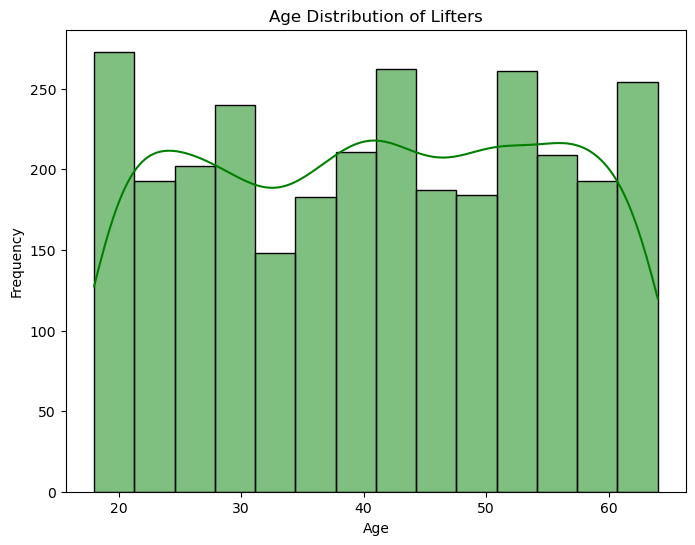

In [38]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True, color='green')
plt.title('Age Distribution of Lifters')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


### Lift Type Comparison by Amount Lifted

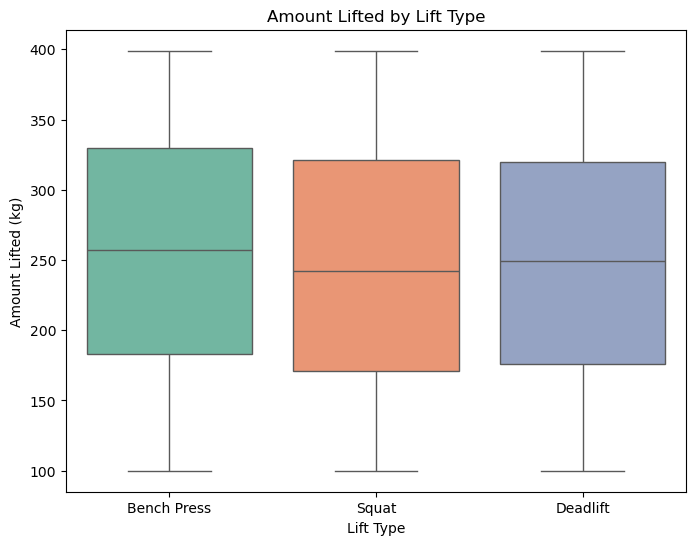

In [47]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Lift Type', y='Amount Lifted (kg)', hue='Lift Type' , data=df, palette='Set2')
plt.title('Amount Lifted by Lift Type')
plt.xlabel('Lift Type')
plt.ylabel('Amount Lifted (kg)')
plt.show()

###  Total Amount Lifted by Lift Type

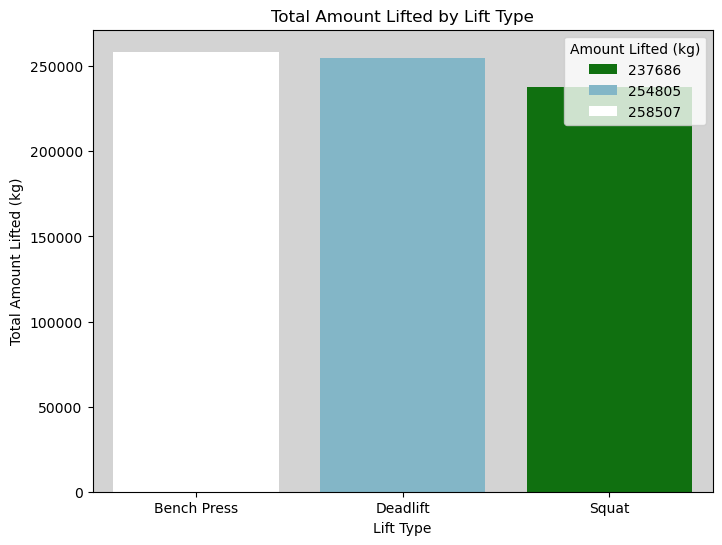

In [64]:
total_lift_by_type = df.groupby('Lift Type')['Amount Lifted (kg)'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Lift Type', y='Amount Lifted (kg)', hue='Amount Lifted (kg)', data=total_lift_by_type, palette='ocean')
plt.gca().set_facecolor('lightgray')

plt.title('Total Amount Lifted by Lift Type')
plt.xlabel('Lift Type')
plt.ylabel('Total Amount Lifted (kg)')
plt.show()

### Scatter Plot of Amount Lifted vs Age

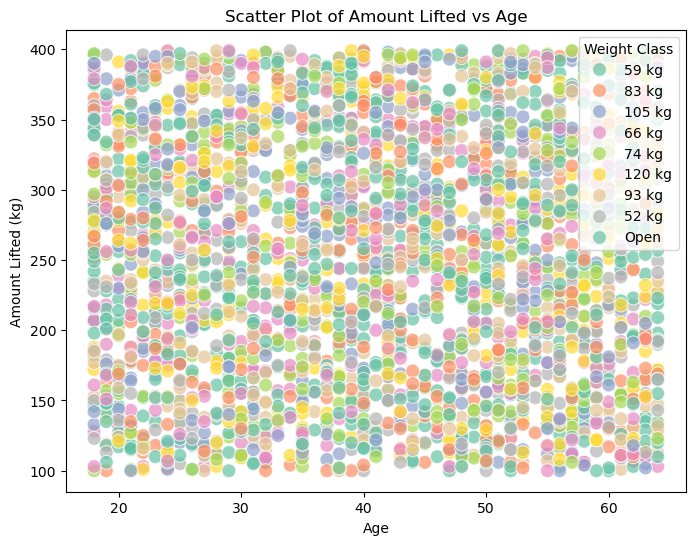

In [66]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Amount Lifted (kg)', data=df, hue='Weight Class', palette='Set2', s=100, alpha=0.7)
plt.title('Scatter Plot of Amount Lifted vs Age')
plt.xlabel('Age')
plt.ylabel('Amount Lifted (kg)')
plt.show()


### Top 5 Lifters by Amount Lifted

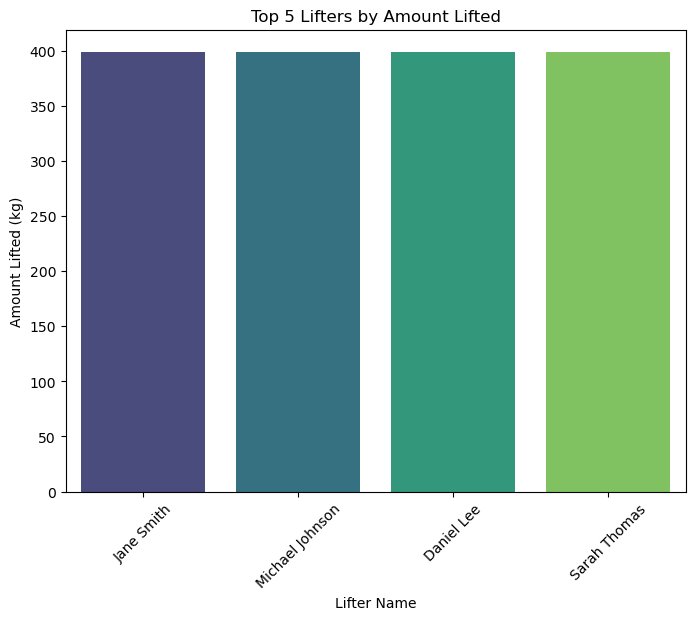

In [75]:
top_5_lifters = df.nlargest(5, 'Amount Lifted (kg)')

plt.figure(figsize=(8, 6))
sns.barplot(x='Lifter Name', y='Amount Lifted (kg)', hue='Lifter Name' ,data=top_5_lifters, palette='viridis')
plt.title('Top 5 Lifters by Amount Lifted')
plt.xlabel('Lifter Name')
plt.ylabel('Amount Lifted (kg)')
plt.xticks(rotation=45)
plt.show()


In [78]:
df.columns

Index(['Lifter Name', 'Age', 'Weight Class', 'Lift Type',
       'Amount Lifted (kg)'],
      dtype='object')

### Facet Grid for Amount Lifted (kg) vs. Age by Weight Class

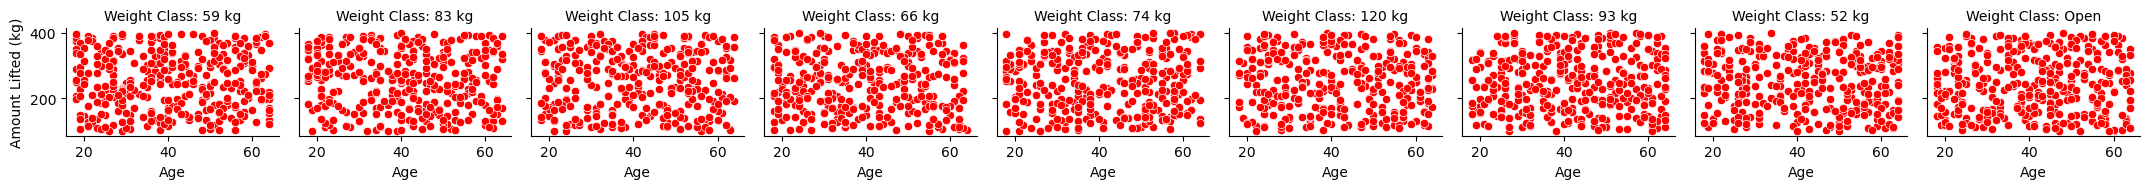

In [103]:
g = sns.FacetGrid(df, col='Weight Class', height=2, aspect=1.2)
g.map(sns.scatterplot, 'Age', 'Amount Lifted (kg)', color='r')

g.set_axis_labels('Age', 'Amount Lifted (kg)')
g.set_titles('Weight Class: {col_name}')
plt.show()


### Facet Grid for Age Distribution by Weight Class

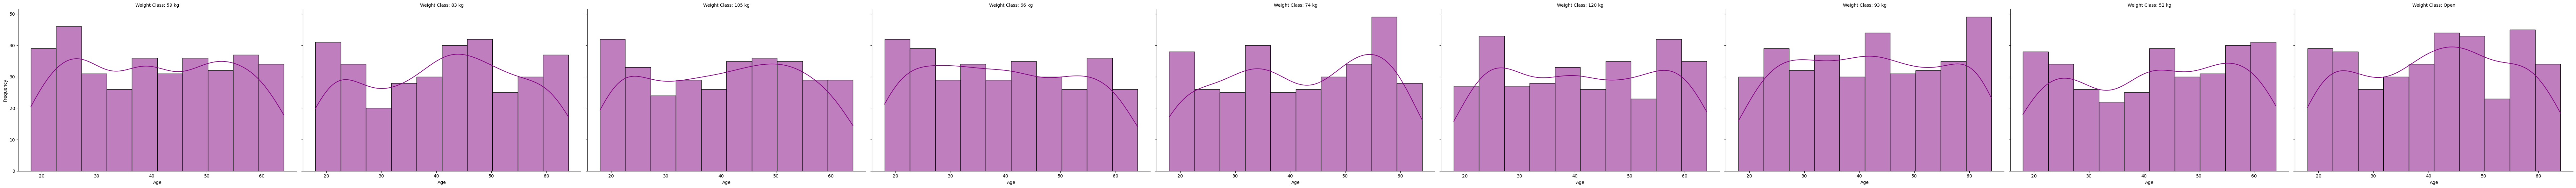

In [110]:
g = sns.FacetGrid(df, col='Weight Class', height=6, aspect=1.5)
g.map(sns.histplot, 'Age', kde=True, color='purple')

g.set_axis_labels('Age', 'Frequency')
g.set_titles('Weight Class: {col_name}')
plt.show()


###  Are there any outliers in the amount lifted?

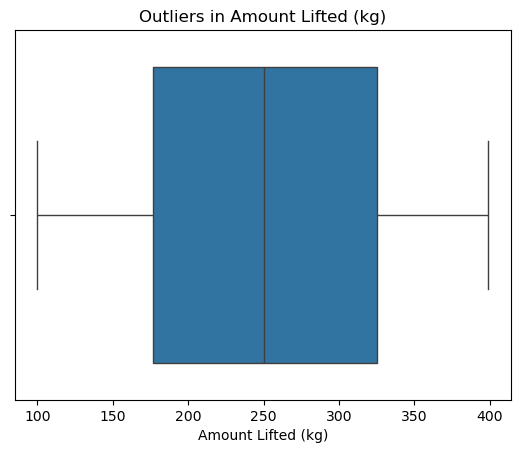

In [114]:
sns.boxplot(x='Amount Lifted (kg)', data=df)
plt.title('Outliers in Amount Lifted (kg)')
plt.xlabel('Amount Lifted (kg)')
plt.show()


###  What is the relationship between Age and Weight Class?

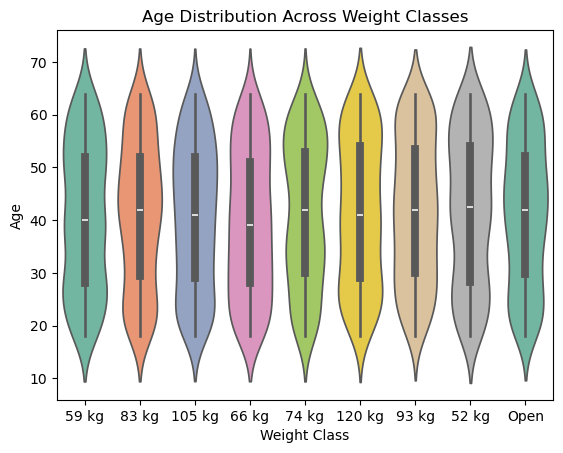

In [129]:
sns.violinplot(x='Weight Class', y='Age', hue='Weight Class',data=df,palette='Set2')
plt.title('Age Distribution Across Weight Classes')
plt.xlabel('Weight Class')
plt.ylabel('Age')
plt.show()

### What is the correlation between numerical columns (e.g., Age, Amount Lifted (kg))?

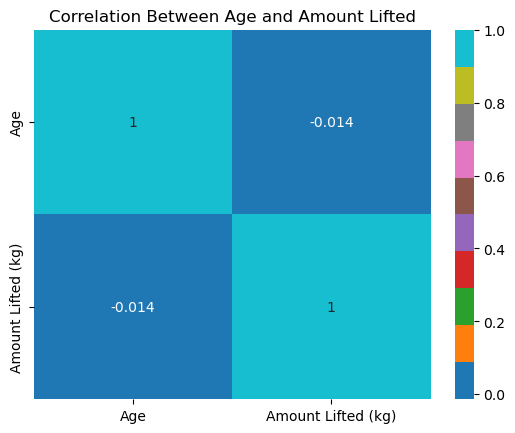

In [136]:
corr_matrix = df[['Age', 'Amount Lifted (kg)']].corr()


sns.heatmap(corr_matrix, annot=True, cmap='tab10')
plt.title('Correlation Between Age and Amount Lifted')
plt.show()


### How many lifters are there in each weight class?

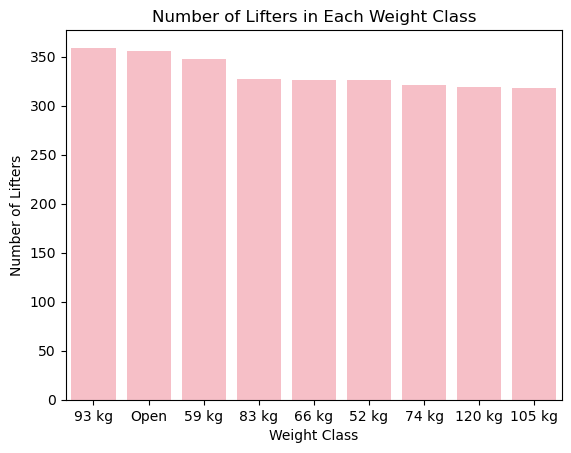

In [145]:
weight_class_count = df['Weight Class'].value_counts()

# Plotting the number of lifters in each weight class
sns.barplot(x=weight_class_count.index, y=weight_class_count.values, color='lightpink')
plt.title('Number of Lifters in Each Weight Class')
plt.xlabel('Weight Class')
plt.ylabel('Number of Lifters')
plt.show()
